# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

**Note:** Downloaded and uploaded file `manually`.

In [1]:
import pandas as pd
import numpy as np
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [2]:
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename = url.split('/')[-1]
r = requests.get(url, allow_redirects=True)
open(filename, 'wb').write(r.content)

335079

In [4]:
dog_breed = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

<div class="alert alert-block alert-warning">
    <b>Note:</b> Seems that twitter free tier API <b>does not</b> allow anymore to retrieve tweets, just post.  
    <br>
          Did that using beautiful soup and selenium as excercise but used 'tweet_json.txt' file.
</div>

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
tweet_likes = pd.read_json('tweet_json.txt', lines=True)

In [6]:
tweet_likes.head(1)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [7]:
twitter_archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2111,670442337873600512,NaN,NaN,2015-11-28 03:21:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Koda. He's large. Looks very soft. Great ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670442337...,11,10,Koda,None,None,None,None
670,789986466051088384,NaN,NaN,2016-10-23 00:27:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Happy. He's a bathtub reviewer. Seems ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789986466...,12,10,Happy,None,None,None,None
841,766864461642756096,NaN,NaN,2016-08-20 05:08:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs... this is a ...,7.599238e+17,4.196984e+09,2016-08-01 01:28:46 +0000,https://twitter.com/dog_rates/status/759923798...,10,10,None,None,None,None,None


In [8]:
twitter_archive.text.duplicated().sum()

0

In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
pd.options.display.max_colwidth = 0
twitter_archive[twitter_archive['rating_denominator'] != 10][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [11]:
#Count rows with duplicate URLs

#create list of expanded urls
expanded_urls_list = twitter_archive.expanded_urls.tolist()
duplicated_urls = 0 #initialize counter for duplicated URLs in the dataset
for url1 in expanded_urls_list:
    try:
        temp_list = url1.split(',')
        temp_list_unique = set(temp_list)
        # print(f'Row {i} {url1}')
        # print(f'List items:   {len(temp_list)}')
        # print(f'Unique items: {len(temp_list_unique)}')
        if len(temp_list) > len(temp_list_unique):
            duplicated_urls += 1
    except:
        pass
print(f'Duplicated urls: {duplicated_urls}')

Duplicated urls: 627


### Quality issues
`twitter_archive` table
1. `expanded_urls` are repeated

2. Row 313 rating should be 13/10.

3. Wrong rating picked for rows: 1165, 1202

4. Multiplied rating * dogs for rows: 1228, 1254, 1274, 1351, 1433.

5. Row 1598 should be 24/20 instead of 4/20

6. Row 1634 should be 11/10. (multiplied rating * dogs).

7. Row 1635 should be 11/10 (multiplied rating * dogs).

8. Row 1662 should should be 10/10.

9. Row 1779 should be 12/10.

10. Row 1843 should be 11/10.

11. Row 2335 should be 9/10.

12. Row 342 is not a rating its a date.

13. Row 516 is not a rating. (24/7 means all the time)

14. Row 1068 is not a rating. (means 9/11 date)

15. Row 1663 not a rating but a year.

16. Rows 45, 695, 763 and 1712 have floats in the text describing the numerator.

### Tidiness issues
17. doggo, floffer, pupper and puppo all refer to the same thing. There should be 1 column.

18. There are only 4 sources, There should be 1 column that states the source in a clear way.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [12]:
# Make copies of original pieces of data
twitter_archive_cp = twitter_archive.copy()

In [13]:
twitter_archive_cp = pd.merge(twitter_archive_cp, 
                              tweet_likes[['id', 'favorite_count', 'retweet_count']], 
                              left_on='tweet_id', right_on='id',
                              how='left')

twitter_archive_cp = pd.merge(twitter_archive_cp, 
                              dog_breed[['tweet_id', 'p1', 'p1_conf', 'p1_dog']], 
                              left_on='tweet_id', right_on='tweet_id',
                              how='left')

In [14]:
twitter_archive_cp.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,doggo,floofer,pupper,puppo,id,favorite_count,retweet_count,p1,p1_conf,p1_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,None,None,None,None,8.924206e+17,39467.0,8853.0,orange,0.097049,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,None,None,None,None,8.921774e+17,33819.0,6514.0,Chihuahua,0.323581,True


In [15]:
twitter_archive_cp.rename(columns = {'p1':'dog_breed', 'p1_conf':'breed_confidence', 'p1_dog':'is_dog'}, inplace=True)

In [16]:
twitter_archive_cp.drop(['id'], axis=1, inplace=True)

In [17]:
twitter_archive_cp.head(7).expanded_urls

0    https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                
1    https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                
2    https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                
3    https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                
4    https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1
5    https://twitter.com/dog_rates/status/891087950875897856/photo/1                                                                
6    https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1                    
Name: expanded_urls, dtype: object

### Issue #1:

#### Define:
Remove all the duplicated urls programatically from the `expanded_urls` column

#### Code

In [18]:
# Remove duplicate urls in expanded_urls
def remove_ep_url_duplicates(x):
    try:
        temp_list = x.split(',')
        temp_list_unique = set(temp_list)
        return ','.join(temp_list_unique)
    except:
        return x

In [19]:
twitter_archive_cp['expanded_urls'] = twitter_archive_cp['expanded_urls'].apply(remove_ep_url_duplicates)

In [20]:
twitter_archive_cp.head(8).expanded_urls

0    https://twitter.com/dog_rates/status/892420643555336193/photo/1                                            
1    https://twitter.com/dog_rates/status/892177421306343426/photo/1                                            
2    https://twitter.com/dog_rates/status/891815181378084864/photo/1                                            
3    https://twitter.com/dog_rates/status/891689557279858688/photo/1                                            
4    https://twitter.com/dog_rates/status/891327558926688256/photo/1                                            
5    https://twitter.com/dog_rates/status/891087950875897856/photo/1                                            
6    https://twitter.com/dog_rates/status/890971913173991426/photo/1,https://gofundme.com/ydvmve-surgery-for-jax
7    https://twitter.com/dog_rates/status/890729181411237888/photo/1                                            
Name: expanded_urls, dtype: object

#### Test

In [21]:
#Count rows with duplicate URLs

#create list of expanded urls
expanded_urls_list = twitter_archive_cp.expanded_urls.tolist()
duplicated_urls = 0 #initialize counter for duplicated URLs in the dataset
for url1 in expanded_urls_list:
    try:
        temp_list = url1.split(',')
        temp_list_unique = set(temp_list)
        if len(temp_list) > len(temp_list_unique):
            duplicated_urls += 1
    except:
        pass
print(f'Duplicated urls: {duplicated_urls}')

Duplicated urls: 0


### Issue #2:

#### Define
For row 313, `rating_numerator` change to 13 and `rating_denominator` change to 10. 

In [22]:
twitter_archive_cp[['text', 'rating_numerator', 'rating_denominator']].iloc[313]

text                  @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
rating_numerator      960                                                                                               
rating_denominator    0                                                                                                 
Name: 313, dtype: object

#### Code

In [23]:
twitter_archive_cp.loc[twitter_archive_cp.index == 313, 'rating_numerator'] = 13
twitter_archive_cp.loc[twitter_archive_cp.index == 313, 'rating_denominator'] = 10

#### Test

In [24]:
twitter_archive_cp[['text', 'rating_numerator', 'rating_denominator']].iloc[313]

text                  @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
rating_numerator      13                                                                                                
rating_denominator    10                                                                                                
Name: 313, dtype: object

### Issue #3:

#### Define
Change the rating on 1165, rating_numerator to 13 and rating_denominator to 10.
Change the rating on 1202, rating_numerator to 11 and rating_denominator to 10.

In [25]:
print(twitter_archive_cp[['text', 'rating_numerator', 'rating_denominator']].iloc[1165])
print(twitter_archive_cp[['text', 'rating_numerator', 'rating_denominator']].iloc[1202])

text                  Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
rating_numerator      4                                                               
rating_denominator    20                                                              
Name: 1165, dtype: object
text                  This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
rating_numerator      50                                                                                                                   
rating_denominator    50                                                                                                                   
Name: 1202, dtype: object


#### Code

In [26]:
twitter_archive_cp.loc[twitter_archive_cp.index == 1165, 'rating_numerator'] = 13
twitter_archive_cp.loc[twitter_archive_cp.index == 1165, 'rating_denominator'] = 10
twitter_archive_cp.loc[twitter_archive_cp.index == 1202, 'rating_numerator'] = 11
twitter_archive_cp.loc[twitter_archive_cp.index == 1202, 'rating_denominator'] = 10

#### Test

In [27]:
print(twitter_archive_cp[['text', 'rating_numerator', 'rating_denominator']].iloc[1165])
print(twitter_archive_cp[['text', 'rating_numerator', 'rating_denominator']].iloc[1202])

text                  Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
rating_numerator      13                                                              
rating_denominator    10                                                              
Name: 1165, dtype: object
text                  This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
rating_numerator      11                                                                                                                   
rating_denominator    10                                                                                                                   
Name: 1202, dtype: object


### Issue #4:

#### Define
Change row 1228 rating_numerator to 11 and rating denominator to 10.  
Change row 1254 rating_numerator to 10 and rating denominator to 10.  
Change row 1274 rating_numerator to  9 and rating denominator to 10.  
Change row 1351 rating_numerator to 12 and rating denominator to 10.  
Change row 1433 rating_numerator to 11 and rating denominator to 10.

In [28]:
print(twitter_archive_cp[['text', 'rating_numerator', 'rating_denominator']].iloc[1228])
print(twitter_archive_cp[['text', 'rating_numerator', 'rating_denominator']].iloc[1254])
print(twitter_archive_cp[['text', 'rating_numerator', 'rating_denominator']].iloc[1274])
print(twitter_archive_cp[['text', 'rating_numerator', 'rating_denominator']].iloc[1351])
print(twitter_archive_cp[['text', 'rating_numerator', 'rating_denominator']].iloc[1433])

text                  Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
rating_numerator      99                                                                                           
rating_denominator    90                                                                                           
Name: 1228, dtype: object
text                  Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
rating_numerator      80                                                                                                          
rating_denominator    80                                                                                                          
Name: 1254, dtype: object
text                  From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
rating_numerator      45              

#### Code

In [29]:
twitter_archive_cp.loc[twitter_archive_cp.index == 1228, 'rating_numerator'] = 11
twitter_archive_cp.loc[twitter_archive_cp.index == 1228, 'rating_denominator'] = 10
twitter_archive_cp.loc[twitter_archive_cp.index == 1254, 'rating_numerator'] = 10
twitter_archive_cp.loc[twitter_archive_cp.index == 1254, 'rating_denominator'] = 10
twitter_archive_cp.loc[twitter_archive_cp.index == 1274, 'rating_numerator'] = 9
twitter_archive_cp.loc[twitter_archive_cp.index == 1274, 'rating_denominator'] = 10
twitter_archive_cp.loc[twitter_archive_cp.index == 1351, 'rating_numerator'] = 12
twitter_archive_cp.loc[twitter_archive_cp.index == 1351, 'rating_denominator'] = 10
twitter_archive_cp.loc[twitter_archive_cp.index == 1433, 'rating_numerator'] = 11
twitter_archive_cp.loc[twitter_archive_cp.index == 1433, 'rating_denominator'] = 10

#### Test

In [30]:
assert twitter_archive_cp.loc[twitter_archive_cp.index == 1228, 'rating_numerator'].values[0] == 11
assert twitter_archive_cp.loc[twitter_archive_cp.index == 1228, 'rating_denominator'].values[0] == 10
assert twitter_archive_cp.loc[twitter_archive_cp.index == 1254, 'rating_numerator'].values[0] == 10
assert twitter_archive_cp.loc[twitter_archive_cp.index == 1254, 'rating_denominator'].values[0] == 10
assert twitter_archive_cp.loc[twitter_archive_cp.index == 1274, 'rating_numerator'].values[0] == 9
assert twitter_archive_cp.loc[twitter_archive_cp.index == 1274, 'rating_denominator'].values[0] == 10
assert twitter_archive_cp.loc[twitter_archive_cp.index == 1351, 'rating_numerator'].values[0] == 12
assert twitter_archive_cp.loc[twitter_archive_cp.index == 1351, 'rating_denominator'].values[0] == 10
assert twitter_archive_cp.loc[twitter_archive_cp.index == 1433, 'rating_numerator'].values[0] == 11
assert twitter_archive_cp.loc[twitter_archive_cp.index == 1433, 'rating_denominator'].values[0] == 10

### Issue #5:

#### Define

On row 1598 change rating_denominator value to 12 and rating_denominator to 10.

In [31]:
print(twitter_archive_cp[['text', 'rating_numerator', 'rating_denominator']].iloc[1598])

text                  Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating
rating_numerator      4                                                                                                                                       
rating_denominator    20                                                                                                                                      
Name: 1598, dtype: object


#### Code

In [32]:
twitter_archive_cp.loc[twitter_archive_cp.index == 1598, 'rating_numerator'] = 12
twitter_archive_cp.loc[twitter_archive_cp.index == 1598, 'rating_denominator'] = 10

#### Test

In [33]:
assert twitter_archive_cp.loc[twitter_archive_cp.index == 1598, 'rating_numerator'].values[0] == 12
assert twitter_archive_cp.loc[twitter_archive_cp.index == 1598, 'rating_denominator'].values[0] == 10

### Issue #6:

#### Define

On row 1634 change rating_numerator to 11 and rating_denominator to 10.

In [34]:
print(twitter_archive_cp[['text', 'rating_numerator', 'rating_denominator']].iloc[1634])

text                  Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
rating_numerator      143                                                                                                                           
rating_denominator    130                                                                                                                           
Name: 1634, dtype: object


#### Code

In [35]:
twitter_archive_cp.loc[twitter_archive_cp.index == 1634, 'rating_numerator'] = 11
twitter_archive_cp.loc[twitter_archive_cp.index == 1634, 'rating_denominator'] = 10

#### Test

In [36]:
assert twitter_archive_cp.loc[twitter_archive_cp.index == 1634, 'rating_numerator'].values[0] == 11
assert twitter_archive_cp.loc[twitter_archive_cp.index == 1634, 'rating_denominator'].values[0] == 10

### Issue #7:

#### Define

On row 1635 change rating_numerator to 11 and rating_denominator to 10.

In [37]:
print(twitter_archive_cp[['text', 'rating_numerator', 'rating_denominator']].iloc[1635])

text                  Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
rating_numerator      121                                                                                                                                         
rating_denominator    110                                                                                                                                         
Name: 1635, dtype: object


#### Code

In [38]:
twitter_archive_cp.loc[twitter_archive_cp.index == 1635, 'rating_numerator'] = 11
twitter_archive_cp.loc[twitter_archive_cp.index == 1635, 'rating_denominator'] = 10

#### Test

In [39]:
assert twitter_archive_cp.loc[twitter_archive_cp.index == 1635, 'rating_numerator'].values[0] == 11
assert twitter_archive_cp.loc[twitter_archive_cp.index == 1635, 'rating_denominator'].values[0] == 10

### Issue #8:

#### Define

On row 1662, rating_numerator should be 10. and rating_denominator should be 10.

In [40]:
print(twitter_archive_cp[['text', 'rating_numerator', 'rating_denominator']].iloc[1662])

text                  This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
rating_numerator      7                                                                                                                                          
rating_denominator    11                                                                                                                                         
Name: 1662, dtype: object


#### Code

In [41]:
twitter_archive_cp.loc[twitter_archive_cp.index == 1662, 'rating_numerator'] = 10
twitter_archive_cp.loc[twitter_archive_cp.index == 1662, 'rating_denominator'] = 10

#### Test

In [42]:
assert twitter_archive_cp.loc[twitter_archive_cp.index == 1662, 'rating_numerator'].values[0] == 10
assert twitter_archive_cp.loc[twitter_archive_cp.index == 1662, 'rating_denominator'].values[0] == 10

### Issue #9:

#### Define

On row 1779, rating_numerator should be 12 and rating_denominator should be 10.

In [43]:
print(twitter_archive_cp[['text', 'rating_numerator', 'rating_denominator']].iloc[1779])

text                  IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
rating_numerator      144                                                                   
rating_denominator    120                                                                   
Name: 1779, dtype: object


#### Code

In [44]:
twitter_archive_cp.loc[twitter_archive_cp.index == 1779, 'rating_numerator'] = 12
twitter_archive_cp.loc[twitter_archive_cp.index == 1779, 'rating_denominator'] = 10

#### Test

In [45]:
assert twitter_archive_cp.loc[twitter_archive_cp.index == 1779, 'rating_numerator'].values[0] == 12
assert twitter_archive_cp.loc[twitter_archive_cp.index == 1779, 'rating_denominator'].values[0] == 10

### Issue #10:

#### Define

On row 1843, change rating_number to 11 and rating_denominator to 10. 

In [46]:
print(twitter_archive_cp[['text', 'rating_numerator', 'rating_denominator']].iloc[1843])

text                  Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw
rating_numerator      88                                                                                                         
rating_denominator    80                                                                                                         
Name: 1843, dtype: object


#### Code

In [47]:
twitter_archive_cp.loc[twitter_archive_cp.index == 1843, 'rating_numerator'] = 11
twitter_archive_cp.loc[twitter_archive_cp.index == 1843, 'rating_denominator'] = 10

#### Test

In [48]:
assert twitter_archive_cp.loc[twitter_archive_cp.index == 1843, 'rating_numerator'].values[0] == 11
assert twitter_archive_cp.loc[twitter_archive_cp.index == 1843, 'rating_denominator'].values[0] == 10

### Issue #11:

#### Define

On row 2335 change rating_numerator to 9 and rating_denominator to 10. 

In [49]:
print(twitter_archive_cp[['text', 'rating_numerator', 'rating_denominator']].iloc[2335])

text                  This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
rating_numerator      1                                                                                                                                       
rating_denominator    2                                                                                                                                       
Name: 2335, dtype: object


#### Code

In [50]:
twitter_archive_cp.loc[twitter_archive_cp.index == 2335, 'rating_numerator'] = 9
twitter_archive_cp.loc[twitter_archive_cp.index == 2335, 'rating_denominator'] = 10

#### Test

In [51]:
assert twitter_archive_cp.loc[twitter_archive_cp.index == 2335, 'rating_numerator'].values[0] == 9
assert twitter_archive_cp.loc[twitter_archive_cp.index == 2335, 'rating_denominator'].values[0] == 10

### Issue #12, 13, 14 & 15:

#### Define

Drop rows 342, 516, 1068, 1663.

#### Code

In [52]:
twitter_archive_cp.drop([342,516,1068,1663], inplace=True)

#### Test

In [53]:
pd.options.display.max_colwidth = 0
twitter_archive_cp[twitter_archive_cp['rating_denominator'] != 10][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170


### Issue #16:

#### Define

Rows 45, 695, 763, 1712, round rating_numerator float.

In [54]:
twitter_archive_cp.filter(items = [45, 695,763,1712], axis=0)[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


#### Code

In [55]:
twitter_archive_cp.loc[twitter_archive_cp.index == 45, 'rating_numerator'] = 14
twitter_archive_cp.loc[twitter_archive_cp.index == 695, 'rating_numerator'] = 10
twitter_archive_cp.loc[twitter_archive_cp.index == 763, 'rating_numerator'] = 11
twitter_archive_cp.loc[twitter_archive_cp.index == 1712, 'rating_numerator'] = 11

#### Test

In [56]:
twitter_archive_cp.filter(items = [45,695,763,1712], axis=0)[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",14,10
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",10,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11,10


In [57]:
twitter_archive_cp['rating_numerator'] = twitter_archive_cp['rating_numerator'].astype(np.int64)
twitter_archive_cp['rating_denominator'] = twitter_archive_cp['rating_denominator'].astype(np.int64)

#### Test

In [58]:
twitter_archive_cp.filter(items = [433,902,1120], axis=0)[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170


### Issue #17:

#### Define

Consolidate columns `doggo`, `floofer`, `pupper`, `puppo` into one column with the name `size`.

#### Code

In [59]:
twitter_archive_cp.doggo = twitter_archive_cp.doggo.replace('None', np.nan)
twitter_archive_cp.floofer = twitter_archive_cp.floofer.replace('None', np.nan)
twitter_archive_cp.pupper = twitter_archive_cp.pupper.replace('None', np.nan)
twitter_archive_cp.puppo = twitter_archive_cp.puppo.replace('None', np.nan)

In [60]:
twitter_archive_cp[twitter_archive_cp.tweet_id == 854010172552949760]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,dog_breed,breed_confidence,is_dog
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172552949760/photo/1,...,None,doggo,floofer,NaN,NaN,17169.0,3433.0,English_springer,0.354733,True


In [61]:
twitter_archive_cp['size'] = np.nan

In [62]:
for i in twitter_archive_cp.index:
    temp_list = []
    col_list = ['doggo', 'floofer', 'pupper', 'puppo']
    for col in col_list:
        if twitter_archive_cp.loc[twitter_archive_cp.index == i, col].isnull().bool():
            value = np.nan
        else:
            temp_list.append(twitter_archive_cp.loc[twitter_archive_cp.index == i, col].values[0])
    twitter_archive_cp.loc[twitter_archive_cp.index == i, 'size'] = ','.join(temp_list)

In [63]:
twitter_archive_cp['size'] = twitter_archive_cp['size'].replace('', np.nan)

In [64]:
twitter_archive_cp.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace=True)

#### Test

In [65]:
twitter_archive_cp[twitter_archive_cp.tweet_id == 854010172552949760]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_breed,breed_confidence,is_dog,size
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172552949760/photo/1,11,10,None,17169.0,3433.0,English_springer,0.354733,True,"doggo,floofer"


In [66]:
twitter_archive_cp.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_breed,breed_confidence,is_dog,size
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,39467.0,8853.0,orange,0.097049,False,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,33819.0,6514.0,Chihuahua,0.323581,True,NaN


### Issue #18:

#### Define

Eliminate the a tag and just leave the content on column source.

#### Code

In [67]:
source_list = twitter_archive_cp.source.unique().tolist()
source_list_replace = ['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']
source_dict = dict(zip(source_list, source_list_replace))
source_dict

{'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter for iPhone',
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine - Make a Scene',
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'}

In [68]:
twitter_archive_cp['source'] = twitter_archive_cp.replace({'source': source_dict})['source']

#### Test

In [69]:
twitter_archive_cp.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

In [70]:
twitter_archive_cp[['tweet_id', 'source']].head(5)

,tweet_id,source
0,892420643555336193,Twitter for iPhone
1,892177421306343426,Twitter for iPhone
2,891815181378084864,Twitter for iPhone
3,891689557279858688,Twitter for iPhone
4,891327558926688256,Twitter for iPhone


## Re-Assesing Data

### Quality issues
`twitter_archive` table
19. Rows 433, 902 and 1120 rating_numerator and rating_denominator are multiplied by the number of dogs. 

20. Row 784 the rating_numerator should be 14 and the rating_denominator should be 10.

21. Remove retweets and non dogs from dataframe.

### Issue #19:

#### Define

Scale rating_numerator and rating_denominator by rating_denominator / 10.

In [71]:
twitter_archive_cp.filter(items = [433,902,1120], axis=0)[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170


#### Code

In [72]:
factor_433 = twitter_archive_cp.loc[twitter_archive_cp.index == 433, 'rating_denominator'].values[0] / 10
twitter_archive_cp.loc[twitter_archive_cp.index == 433, 'rating_numerator'] = twitter_archive_cp.loc[twitter_archive_cp.index == 433, 'rating_numerator'] / factor_433
twitter_archive_cp.loc[twitter_archive_cp.index == 433, 'rating_denominator'] = twitter_archive_cp.loc[twitter_archive_cp.index == 433, 'rating_denominator'] / factor_433
factor_902 = twitter_archive_cp.loc[twitter_archive_cp.index == 902, 'rating_denominator'].values[0] / 10
twitter_archive_cp.loc[twitter_archive_cp.index == 902, 'rating_numerator'] = twitter_archive_cp.loc[twitter_archive_cp.index == 902, 'rating_numerator'] / factor_902
twitter_archive_cp.loc[twitter_archive_cp.index == 902, 'rating_denominator'] = twitter_archive_cp.loc[twitter_archive_cp.index == 902, 'rating_denominator'] / factor_902
factor_1120 = twitter_archive_cp.loc[twitter_archive_cp.index == 1120, 'rating_denominator'].values[0] / 10
twitter_archive_cp.loc[twitter_archive_cp.index == 1120, 'rating_numerator'] = twitter_archive_cp.loc[twitter_archive_cp.index == 1120, 'rating_numerator'] / factor_1120
twitter_archive_cp.loc[twitter_archive_cp.index == 1120, 'rating_denominator'] = twitter_archive_cp.loc[twitter_archive_cp.index == 1120, 'rating_denominator'] / factor_1120

### Issue #20:

#### Define

In row 784, change rating_numerator to 14, and rating_denominator to 10.

In [73]:
twitter_archive_cp.filter(items = [784], axis=0)[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9.0,11.0


#### Code

In [74]:
twitter_archive_cp.loc[twitter_archive_cp.index == 784, 'rating_numerator'] = 14
twitter_archive_cp.loc[twitter_archive_cp.index == 784, 'rating_denominator'] = 10

#### Test

In [75]:
twitter_archive_cp.filter(items = [784], axis=0)[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",14.0,10.0


### Issue #21:

#### Define

Remove all the retweets from the dataset, which are the rows that contain something on the columns: `retweeted_status_id`, `retweeted_status_user_id`and `retweeted_status_timestamp`.

In [76]:
len(twitter_archive_cp)

2352

#### Code

In [77]:
twitter_archive_filtered = twitter_archive_cp[twitter_archive_cp['in_reply_to_status_id'].isnull() &
                                              twitter_archive_cp['retweeted_status_user_id'].isnull() &
                                              twitter_archive_cp['retweeted_status_timestamp'].isnull() &
                                              twitter_archive_cp['is_dog'] == True]

#### Test

In [78]:
len(twitter_archive_filtered)

1461

In [79]:
twitter_archive_filtered[~twitter_archive_filtered['in_reply_to_status_id'].isnull() & 
                         ~twitter_archive_filtered['retweeted_status_user_id'].isnull() &
                         ~twitter_archive_filtered['retweeted_status_timestamp'].isnull() &
                         ~twitter_archive_filtered['is_dog'] == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_breed,breed_confidence,is_dog,size


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [80]:
twitter_archive_filtered.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

<b>Most common dog breed.</b>

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
dog_tweets_series = twitter_archive_filtered.groupby('dog_breed')['dog_breed'].count().sort_values(ascending=False)
total_num_of_tweets = dog_tweets_series.sum()
num_of_breeds = len(dog_tweets_series)
print(f'Total number of twwets on this dataset: {total_num_of_tweets}')
print(f'Total number of dog breeds listed:      {num_of_breeds}')
print(f'Top 10 breeds: {dog_tweets_series[:10]}')

Total number of twwets on this dataset: 1461
Total number of dog breeds listed:      111
Top 10 breeds: dog_breed
golden_retriever      135
Labrador_retriever    94 
Pembroke              88 
Chihuahua             78 
pug                   54 
chow                  41 
Samoyed               40 
Pomeranian            38 
toy_poodle            37 
malamute              29 
Name: dog_breed, dtype: int64


In [83]:
dog_tweets_series.keys()[:10]

Index(['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'pug', 'chow', 'Samoyed', 'Pomeranian', 'toy_poodle', 'malamute'],
      dtype='object', name='dog_breed')

Text(0.5,1,'Number of tweets')

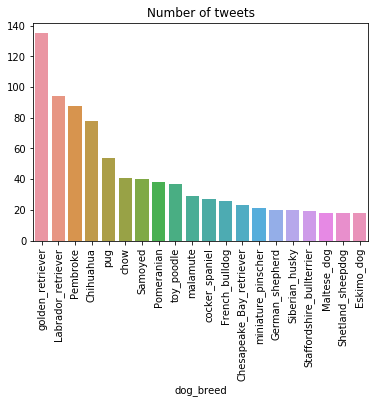

In [84]:
results_to_display = 20
sns.barplot(dog_tweets_series[:results_to_display].keys(),dog_tweets_series[:results_to_display].values)
plt.xticks(rotation='vertical')
plt.title('Number of tweets')

<b>Most liked dog breed.</b>

Text(0.5,1,'Average favorite count')

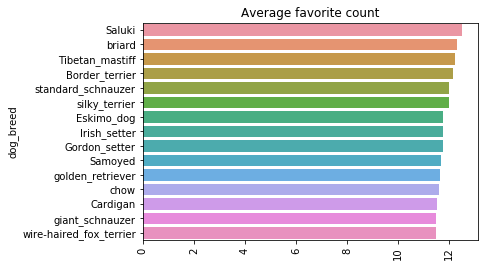

In [85]:
dog_rating_series = twitter_archive_filtered.groupby('dog_breed')['rating_numerator'].mean().sort_values(ascending=False)
# Note: I am just considering numerators because al denominators are now 10
results_to_display = 15
sns.barplot(y=dog_rating_series[:results_to_display].keys(),x=dog_rating_series[:results_to_display].values)
plt.xticks(rotation='vertical')
plt.title('Average favorite count')

<b>Rating behavior / Distribution</b>

Text(0.5,1,'Rating Distribution')

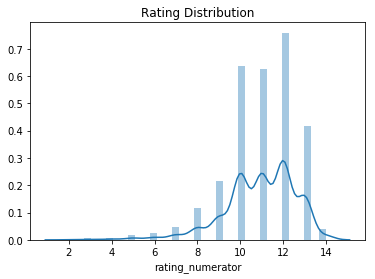

In [86]:
sns.distplot(twitter_archive_filtered['rating_numerator'])
plt.title('Rating Distribution')

In [87]:
len(twitter_archive_filtered[twitter_archive_filtered.rating_numerator < 10])

219

In [88]:
twitter_archive_filtered.rating_numerator.mean()

10.915811088295689

### Insights:
1. Based on tweets the most common dog breed is golden retriever.  
   If you are into dog sales, this could be the best option regarding sales volume.

2. The most liked breed race on average is the Saluki.  
   For likes would be the best choice.  
   
3. The mean is close to 11.  
   For social media favorite counts the more posts, the better.